In [1]:
pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.3 MB 10.3 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.3 MB 9.4 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.3 MB 9.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.3 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 9.1 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/7.2 MB 9.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.2 MB 10.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.0/7.2 MB 9.8 MB/s eta 0:00:01
   ----------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = sns.load_dataset("taxis")

# Display first few rows
df.head()

Matplotlib is building the font cache; this may take a moment.


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


cat_cols = df.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


df.dropna(subset=["pickup", "fare", "distance"], inplace=True)


df.isnull().sum()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_30316\1497702897.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_30316\1497702897.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment u

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

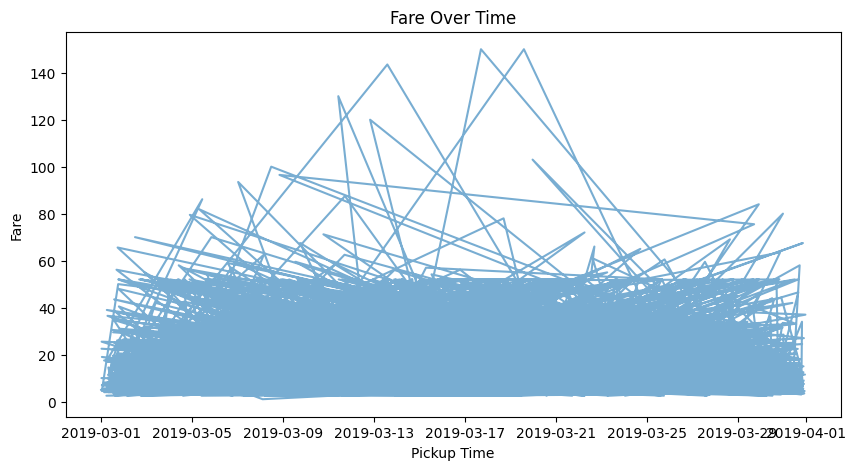

In [5]:
df["pickup"] = pd.to_datetime(df["pickup"])

plt.figure(figsize=(10,5))
plt.plot(df["pickup"], df["fare"], alpha=0.6)
plt.xlabel("Pickup Time")
plt.ylabel("Fare")
plt.title("Fare Over Time")
plt.show()

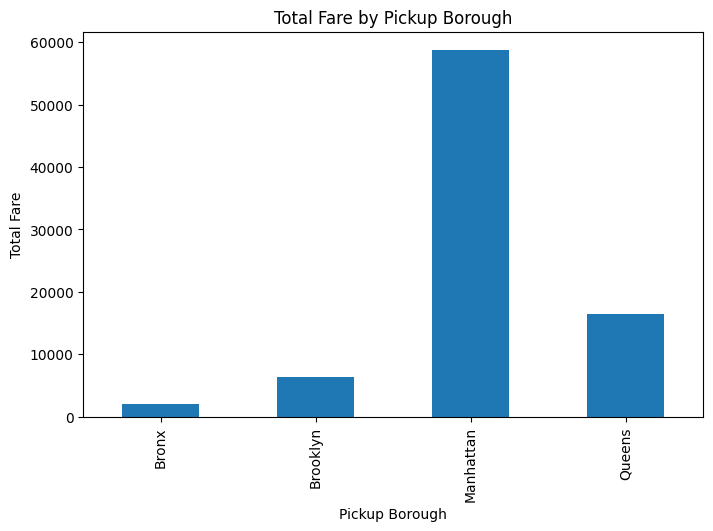

In [6]:
fare_by_borough = df.groupby("pickup_borough")["fare"].sum()

fare_by_borough.plot(kind="bar", figsize=(8,5))
plt.xlabel("Pickup Borough")
plt.ylabel("Total Fare")
plt.title("Total Fare by Pickup Borough")
plt.show()

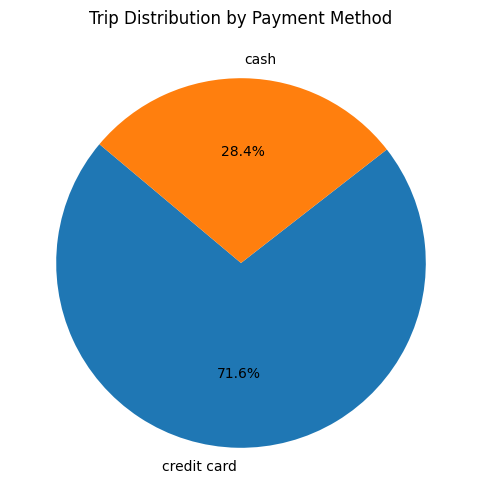

In [7]:
payment_counts = df["payment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Trip Distribution by Payment Method")
plt.show()

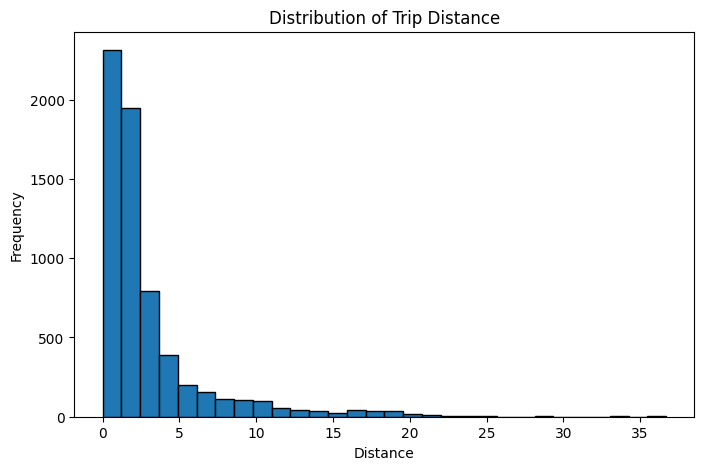

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df["distance"], bins=30, edgecolor="black")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance")
plt.show()

<Figure size 800x500 with 0 Axes>

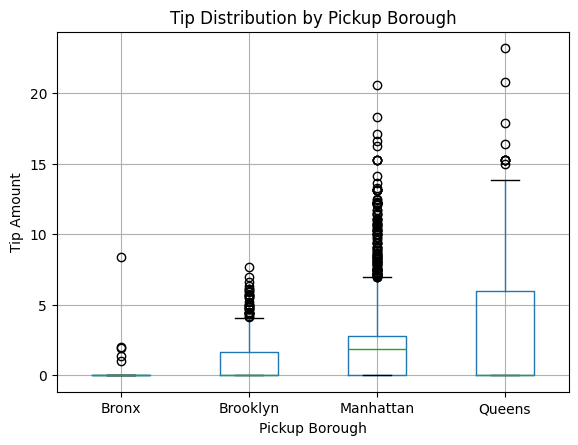

In [9]:
plt.figure(figsize=(8,5))
df.boxplot(column="tip", by="pickup_borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Tip Amount")
plt.title("Tip Distribution by Pickup Borough")
plt.suptitle("")
plt.show()

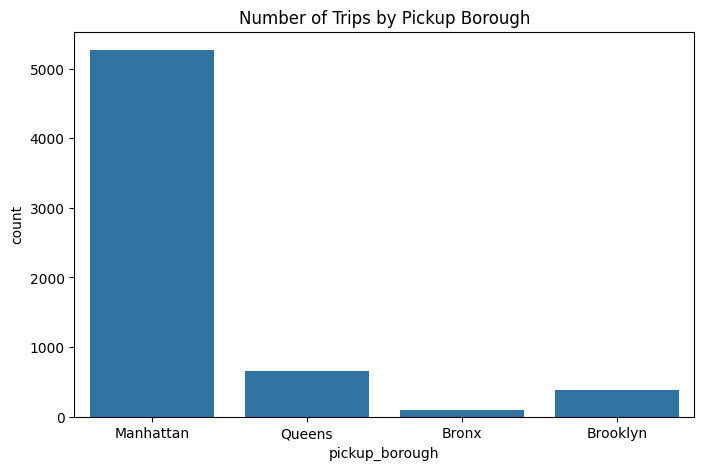

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="pickup_borough")
plt.title("Number of Trips by Pickup Borough")
plt.show()

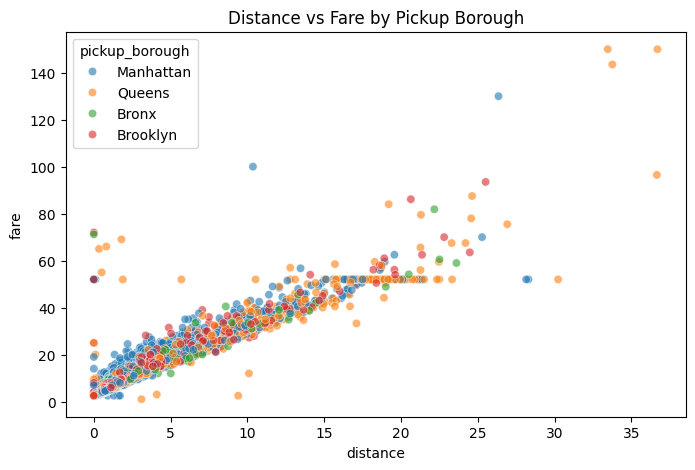

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="distance", y="fare", hue="pickup_borough", alpha=0.6)
plt.title("Distance vs Fare by Pickup Borough")
plt.show()

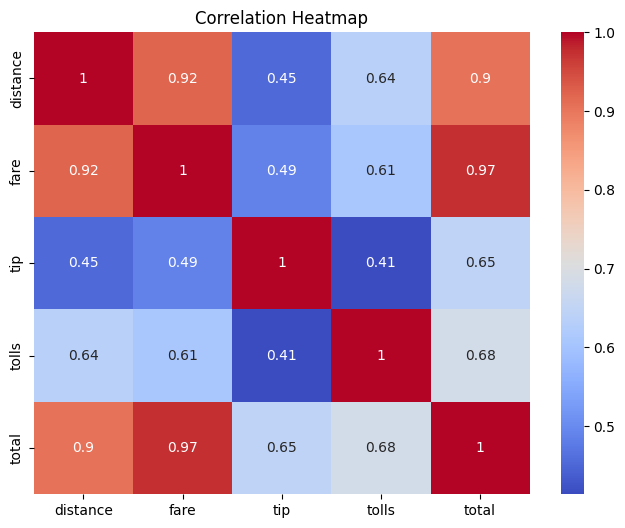

In [12]:
plt.figure(figsize=(8,6))
corr = df[["distance", "fare", "tip", "tolls", "total"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

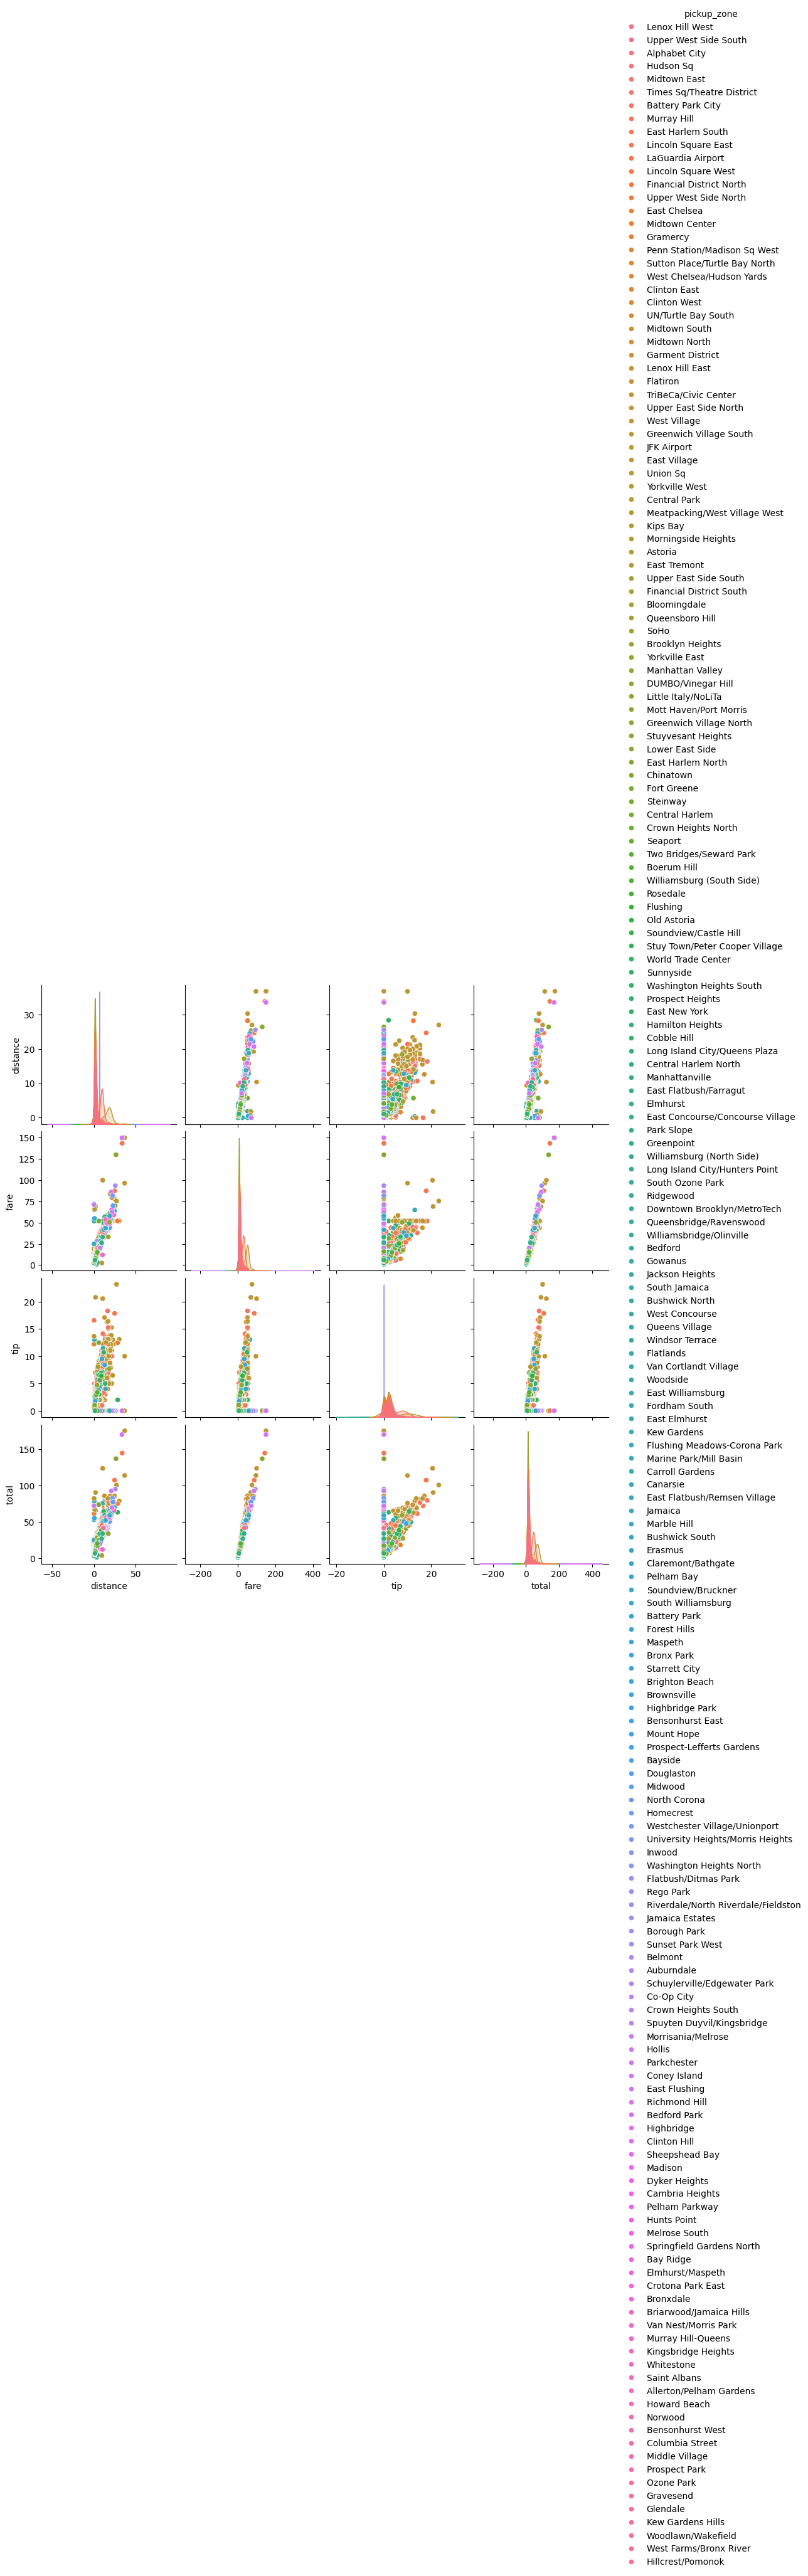

In [13]:
sns.pairplot(
    df,
    vars=["distance", "fare", "tip", "total"],
    hue="pickup_zone"
)
plt.show()

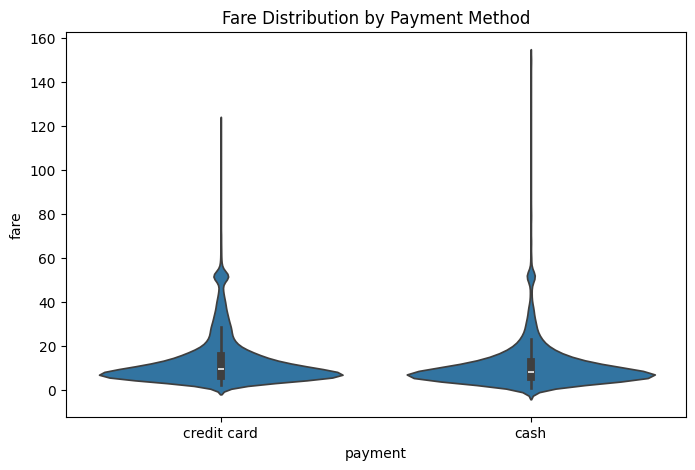

In [14]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="payment", y="fare")
plt.title("Fare Distribution by Payment Method")
plt.show()